### NOMBRE PROYECTO: Describir el Nombre del Proyecto

### FECHA: 

## CONTEXTO
-- Los bancos, como intermediarios financieros, prestan dinero a quienes cumplen con los requisitos establecidos. Sin embargo, cuando llega el momento, una parte de los prestatarios incumplen con sus obligaciones y se atrasan en los pagos. Para el mes de julio del presente año, la morosidad en el sistema financiero peruano se ubicó en 4.04%, en las Mypes fue de 8.07% y en las Cajas Rurales fue de 11.25% (RPP Noticias, 05 de julio de 2021). Según Jorge C. (Diario La República, 09 de febrero de 2020), profesor de la Pacífico Business School, comenta que una de las posibles causas es que la gente aglomera gastos […] pequeños e inconscientes a través de las líneas de crédito asignadas a sus trajetas (tasa promedio anual de 46%, y en retiro de efectivo es de 120% anual). La forma en que los bancos evalúan la posibilidad o no de un crédito es a través del Score de calificación crediticia del cliente. Un score mayor significa un perfil crediticio mejor. Otra forma de evaluación es por medio del nivel de ahorro, y este va de cero a doce, significando este último un 'alto nivel de ahorros'. El atraso histórico (en número de días) también juega un rol importante, así como la calificación absoluta del cliente como 'pagador al día' u 'cliente moroso'. De otro lado, la SBS también clasifica el riesgo de cada crédito: 'cero' es normal, y el nivel 'cuatro' es pérdida. Sin embargo ¿Cómo afectaría la morosidad al banco? "Un incremento en la morosidad aumenta el nivel de riesgo, por tanto crecen las provisiones solicitadas por el regulador (dinero inmovilizado, y que no puede ser prestado). Esta es una forma de afectación, como a la rentabilidad de la entidad financiera, por ejemplo" (Conexión Esan, 13 de diciembre de 2016). Viendo desde el punto de vista del banco, la pregunta sería ¿Qué insights podemos hallar en los datos históricos que nos permitan tomar mejores decisiones antes de efectuar los préstamos? Es así que este trabajo pretende hallar dichos insights, considerados aún invisibles, y relacionados a la morosidad bancaria peruana a través de la formulación de preguntas sencillas. La revisión, limpieza, transformación y modelación de datos servirán de apoyo en la búsqueda de conclusiones, y la guía en la toma de decisiones.

DOI, APA:

Luis Humberto Calderon Baldeón. (2021). BankDefaultAnalysis [Data set]. Kaggle.

https://doi.org/10.34740/KAGGLE/DSV/2528417



### DESCRIPCIÓN DE LA DATA

* 1	**Mora Morosidad del cliente:** {0: paga al día, 1: cliente moroso}
* 2	**Atraso** Atraso histórico del cliente en días.
* 3	**Vivienda** Tipo de vivienda del cliente.
* 4	**Edad** Edad del cliente.
* 5	**Días_lab** Días laborados en su actual empleo.
* 6	**Exp_sf** Meses con experiencia en el sistema financiero, es decir el número de meses que tiene el cliente desde que adquirió algún producto financiero.
* 7	**Nivel_ahorro** Índice del nivel de ahorro del cliente: {0: no tiene ahorros, 12: alto nivel de ahorros}
* 8	**Ingreso**	Ingresos del cliente.
* 9	**Línea_sf** Línea de crédito en el sistema financiero que el cliente tiene disponible.
* 10 **Deuda_sf** Deuda del cliente en el sistema financiero.
* 11 **Score** Calificación crediticia del cliente. Mientras mayor es el score, mejor perfil crediticio tiene el cliente.
* 12 **Zona** Departamento de residencia del cliente.
* 13 **Clasif_sbs** Clasificación SBS. Mientras mayor es el número, peor clasificación tiene el cliente: {0: normal, 1: con problemas potenciales, 2: deficiente, 3: dudoso, * 4: pérdida}
* 14 **Nivel_educ**	Nivel educativo máximo alcanzado por el cliente.



## METODOLOGÍA UTILIZADA EN EL PROYECTO DE CIENCIA DE DATOS
## NOMBRE: CRISP-DM
* FASE 1: Comprensión del Negocio: objetivos especificos de la fase
* FASE 2: Comprensión de los datos: objetivos especificos de la fase
* FASE 3: Preparación de los datos: objetivos especificos de la fase
* FASE 4: Modelado: objetivos especificos de la fase
* FASE 5: Evaluación del modelo: objetivos especificos de la fase
* FASE 6: Despliegue: objetivos especificos de la fase

# FASE 1: Comprensión del Negocio

In [10]:
# Carga de librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Carga Dataset
df = pd.read_csv('data.csv', sep=",")

# FASE 2: Comprensión de los datos

In [4]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Mostrar información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Descripción estadística básica del dataset
print("\nDescripción estadística:")
print(df.describe())

# Verificar si hay valores nulos en el dataset
print("\nValores nulos por columna:")
print(df.isnull().sum())

Primeras filas del dataset:
   mora  atraso  vivienda  edad  dias_lab  exp_sf  nivel_ahorro  ingreso  \
0     0     235  FAMILIAR    30      3748    93.0             5   3500.0   
1     0      18  FAMILIAR    32      4598     9.0            12    900.0   
2     0       0  FAMILIAR    26      5148     8.0             2   2400.0   
3     0       0  FAMILIAR    36      5179    20.0            12   2700.0   
4     0       0  FAMILIAR    46      3960     NaN             1   3100.0   

   linea_sf  deuda_sf  score         zona  clasif_sbs     nivel_educ  
0       NaN      0.00    214         Lima           4  UNIVERSITARIA  
1   1824.67   1933.75    175  La Libertad           1        TECNICA  
2   2797.38    188.29    187         Lima           0  UNIVERSITARIA  
3       NaN      0.00    187       Ancash           0        TECNICA  
4   2000.00  11010.65    189         Lima           0        TECNICA  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries,

In [7]:
df.describe()

,mora,atraso,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,clasif_sbs
count,8399.000000,8399.00000,8399.000000,8399.000000,6569.000000,8399.000000,8399.000000,7272.000000,7938.000000,8399.000000,8399.000000
mean,0.704251,4.46315,36.399095,5555.888796,32.401583,10.593166,4350.406997,11987.241038,6110.724308,196.619955,0.563519
std,0.456406,14.27084,9.825764,2153.244140,32.866232,3.374619,5367.058953,21322.801655,11177.989799,19.544348,0.905637
min,0.000000,0.00000,20.000000,2956.000000,0.000000,0.000000,123.700000,0.000000,0.000000,134.000000,0.000000
25%,0.000000,0.00000,29.000000,4174.000000,7.000000,12.000000,1366.670000,1169.372500,478.320000,182.000000,0.000000
50%,1.000000,0.00000,34.000000,4904.000000,20.000000,12.000000,2400.000000,4030.120000,2258.755000,197.000000,0.000000
75%,1.000000,2.00000,42.000000,6182.000000,51.000000,12.000000,4900.000000,12086.627500,5755.150000,212.000000,1.000000
max,1.000000,245.00000,85.000000,20700.000000,130.000000,12.000000,30000.000000,121543.400000,57094.380000,266.000000,4.000000


In [16]:
info = df.shape
print("\nLa cantidad de filas y columnas en nuestro dataframe es de:",info)


La cantidad de filas y columnas en nuestro dataframe es de: (8399, 14)


In [18]:
tipos = df.dtypes
print("\nTipos de datos presentes en el dataset:\n",tipos)


Tipos de datos presentes en el dataset:
 mora              int64
atraso            int64
vivienda         object
edad              int64
dias_lab          int64
exp_sf          float64
nivel_ahorro      int64
ingreso         float64
linea_sf        float64
deuda_sf        float64
score             int64
zona             object
clasif_sbs        int64
nivel_educ       object
dtype: object


## Análisis Univariado

### Análisis Univariado: **Ingreso**

Análisis Univariado de la Variable 'Profoundity'
Media: 4350.41
Mediana: 2400.00
Desviación Estándar: 5366.74
Valor Mínimo: 123.70
Valor Máximo: 30000.00


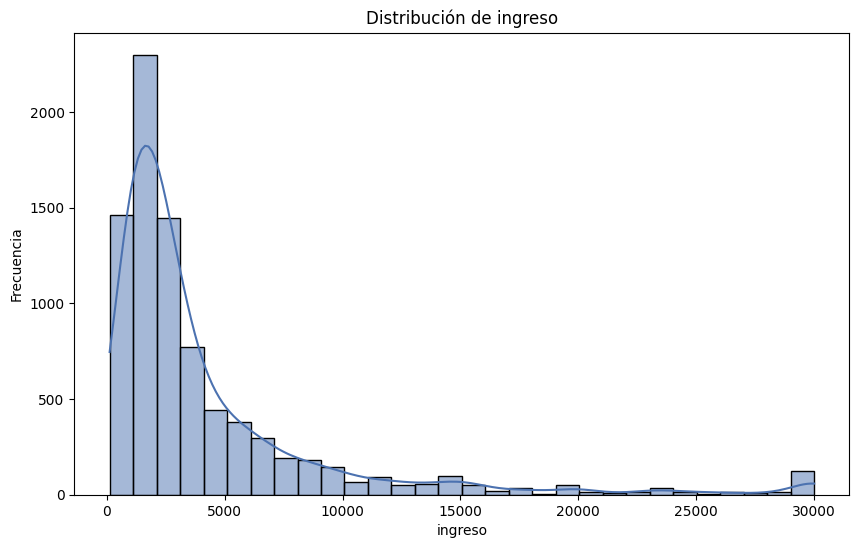

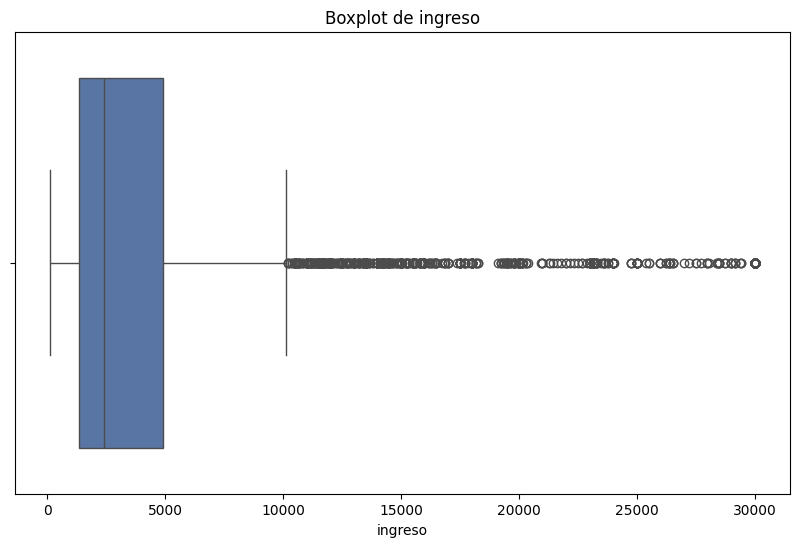

Número de outliers en 'ingreso': 777


In [21]:
# Descripción estadística básica de la variable 'Profoundity'
profundity_mean = np.mean(df['ingreso'])
profundity_median = np.median(df['ingreso'])
profundity_std = np.std(df['ingreso'])
profundity_min = np.min(df['ingreso'])
profundity_max = np.max(df['ingreso'])

print("Análisis Univariado de la Variable 'Profoundity'")
print(f"Media: {profundity_mean:.2f}")
print(f"Mediana: {profundity_median:.2f}")
print(f"Desviación Estándar: {profundity_std:.2f}")
print(f"Valor Mínimo: {profundity_min:.2f}")
print(f"Valor Máximo: {profundity_max:.2f}")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['ingreso'], bins=30, kde=True, color='#4C72B0')
plt.title('Distribución de ingreso')
plt.xlabel('ingreso')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ingreso'], color='#4C72B0')
plt.title('Boxplot de ingreso')
plt.xlabel('ingreso')
plt.show()

# Detección de Outliers
Q1 = np.percentile(df['ingreso'], 25)
Q3 = np.percentile(df['ingreso'], 75)
IQR = Q3 - Q1

outliers = df[(df['ingreso'] < (Q1 - 1.5 * IQR)) | (df['ingreso'] > (Q3 + 1.5 * IQR))]

print(f"Número de outliers en 'ingreso': {len(outliers)}")

Análisis Univariado de la Variable 'nivel_ahorro'
Media: 10.59
Mediana: 12.00
Desviación Estándar: 3.37
Valor Mínimo: 0.00
Valor Máximo: 12.00


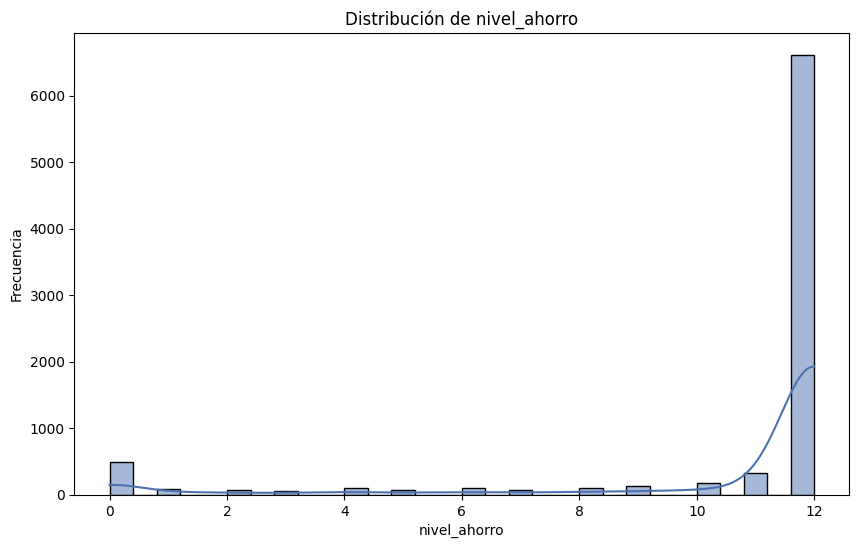

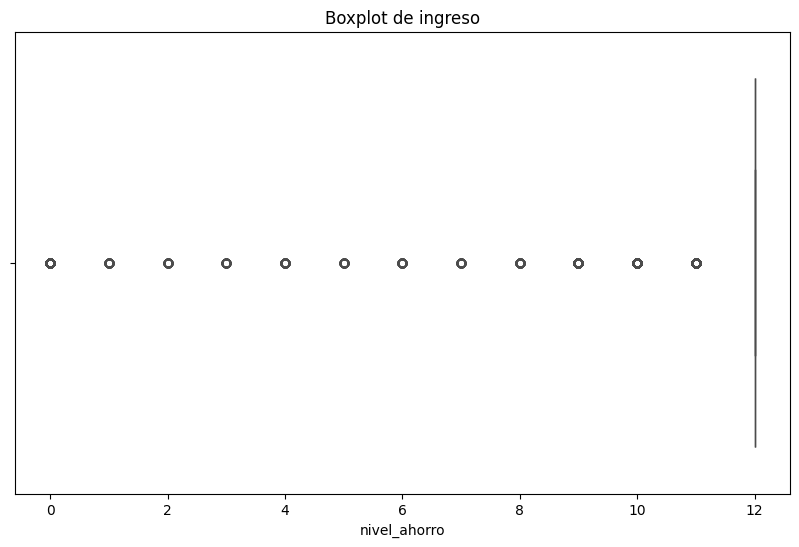

Número de outliers en 'nivel_ahorro': 1780


In [23]:
# Descripción estadística básica de la variable 'Profoundity'
profundity_mean = np.mean(df['nivel_ahorro'])
profundity_median = np.median(df['nivel_ahorro'])
profundity_std = np.std(df['nivel_ahorro'])
profundity_min = np.min(df['nivel_ahorro'])
profundity_max = np.max(df['nivel_ahorro'])

print("Análisis Univariado de la Variable 'nivel_ahorro'")
print(f"Media: {profundity_mean:.2f}")
print(f"Mediana: {profundity_median:.2f}")
print(f"Desviación Estándar: {profundity_std:.2f}")
print(f"Valor Mínimo: {profundity_min:.2f}")
print(f"Valor Máximo: {profundity_max:.2f}")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['nivel_ahorro'], bins=30, kde=True, color='#4C72B0')
plt.title('Distribución de nivel_ahorro')
plt.xlabel('nivel_ahorro')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['nivel_ahorro'], color='#4C72B0')
plt.title('Boxplot de ingreso')
plt.xlabel('nivel_ahorro')
plt.show()

# Detección de Outliers
Q1 = np.percentile(df['nivel_ahorro'], 25)
Q3 = np.percentile(df['nivel_ahorro'], 75)
IQR = Q3 - Q1

outliers = df[(df['nivel_ahorro'] < (Q1 - 1.5 * IQR)) | (df['nivel_ahorro'] > (Q3 + 1.5 * IQR))]

print(f"Número de outliers en 'nivel_ahorro': {len(outliers)}")

### Análisis Univariado: **Edad**

Análisis Univariado de la Variable 'edad'
Media: 36.40
Mediana: 34.00
Desviación Estándar: 9.83
Valor Mínimo: 20.00
Valor Máximo: 85.00


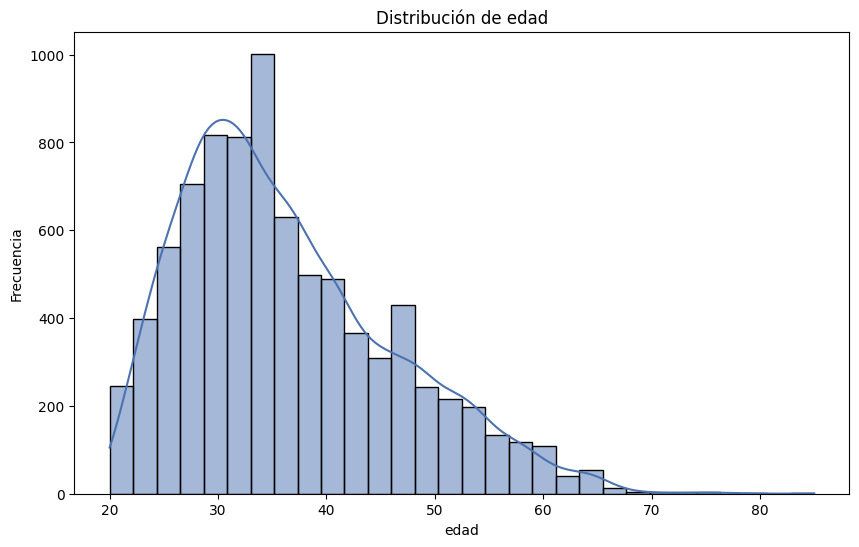

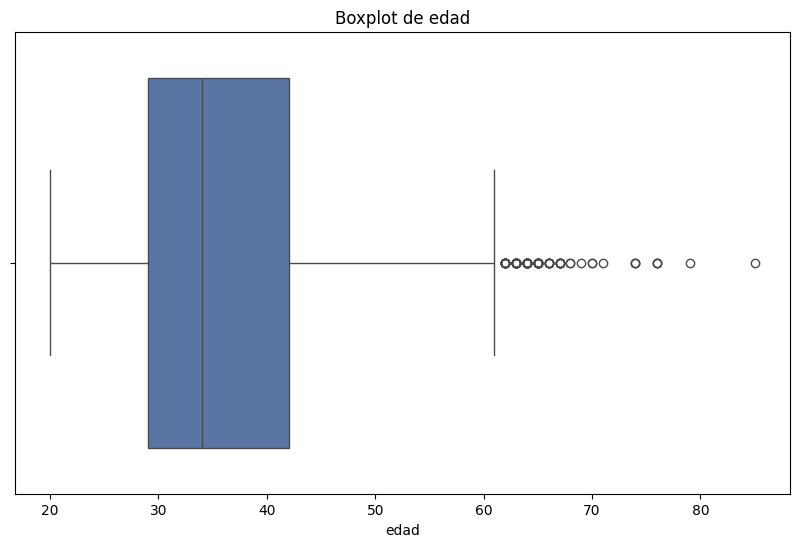

Número de outliers en 'edad': 120


In [22]:
# Descripción estadística básica de la variable 'Profoundity'
profundity_mean = np.mean(df['edad'])
profundity_median = np.median(df['edad'])
profundity_std = np.std(df['edad'])
profundity_min = np.min(df['edad'])
profundity_max = np.max(df['edad'])

print("Análisis Univariado de la Variable 'edad'")
print(f"Media: {profundity_mean:.2f}")
print(f"Mediana: {profundity_median:.2f}")
print(f"Desviación Estándar: {profundity_std:.2f}")
print(f"Valor Mínimo: {profundity_min:.2f}")
print(f"Valor Máximo: {profundity_max:.2f}")

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['edad'], bins=30, kde=True, color='#4C72B0')
plt.title('Distribución de edad')
plt.xlabel('edad')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['edad'], color='#4C72B0')
plt.title('Boxplot de edad')
plt.xlabel('edad')
plt.show()

# Detección de Outliers
Q1 = np.percentile(df['edad'], 25)
Q3 = np.percentile(df['edad'], 75)
IQR = Q3 - Q1

outliers = df[(df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR))]

print(f"Número de outliers en 'edad': {len(outliers)}")

## Análisis Bivariado

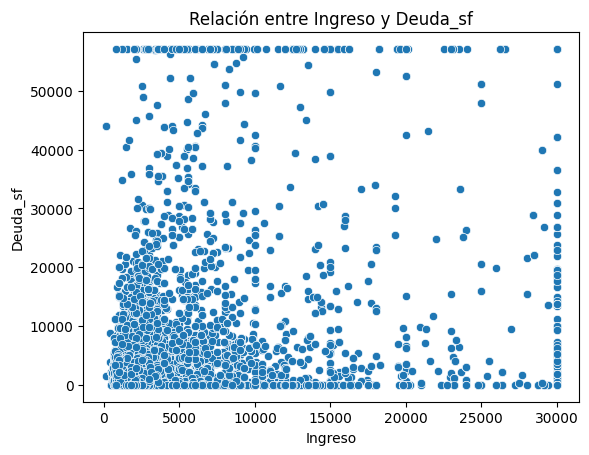

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='ingreso', y='deuda_sf', data=df)
plt.title('Relación entre Ingreso y Deuda_sf')
plt.xlabel('Ingreso')
plt.ylabel('Deuda_sf')
plt.show()


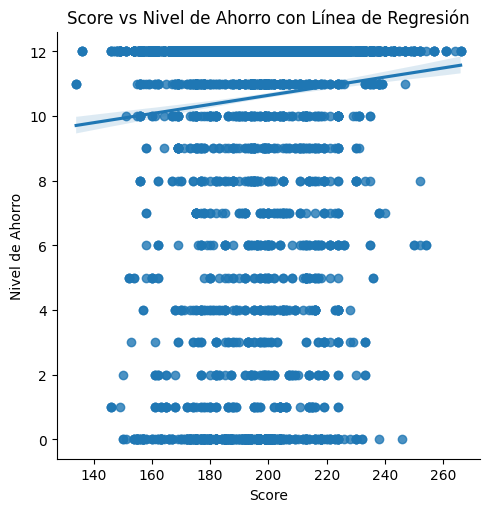

In [27]:
sns.lmplot(x='score', y='nivel_ahorro', data=df)
plt.title('Score vs Nivel de Ahorro con Línea de Regresión')
plt.xlabel('Score')
plt.ylabel('Nivel de Ahorro')
plt.show()


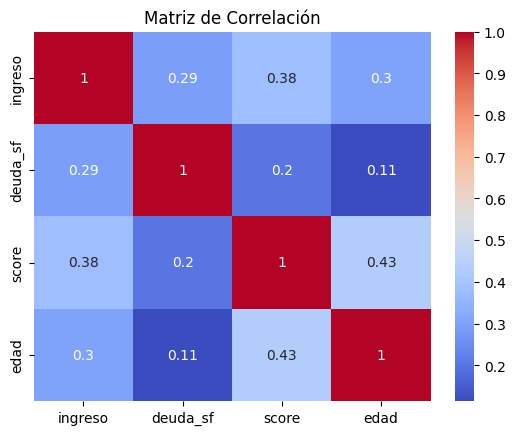

In [29]:
corr = df[['ingreso', 'deuda_sf', 'score', 'edad']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


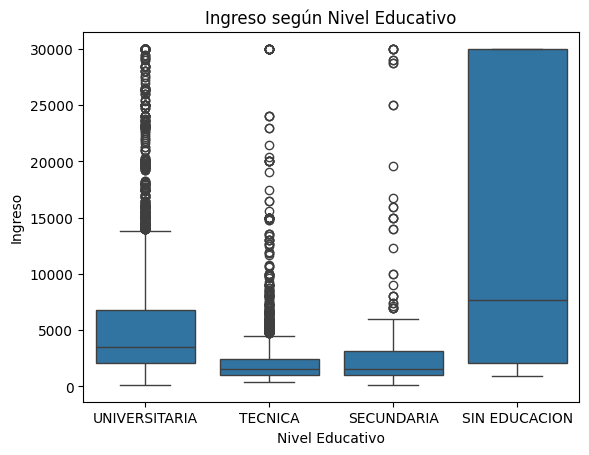

In [30]:
sns.boxplot(x='nivel_educ', y='ingreso', data=df)
plt.title('Ingreso según Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Ingreso')
plt.show()


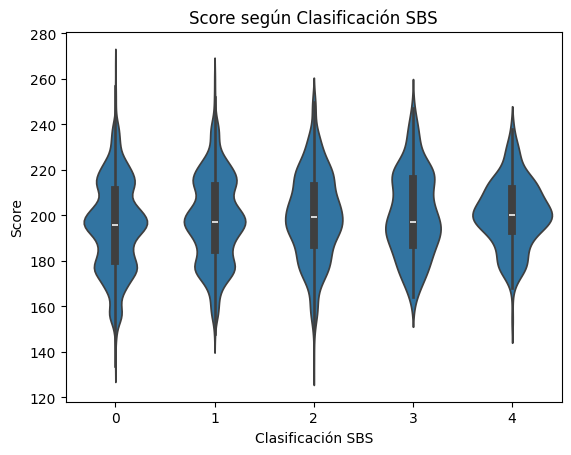

In [32]:
sns.violinplot(x='clasif_sbs', y='score', data=df)
plt.title('Score según Clasificación SBS')
plt.xlabel('Clasificación SBS')
plt.ylabel('Score')
plt.show()


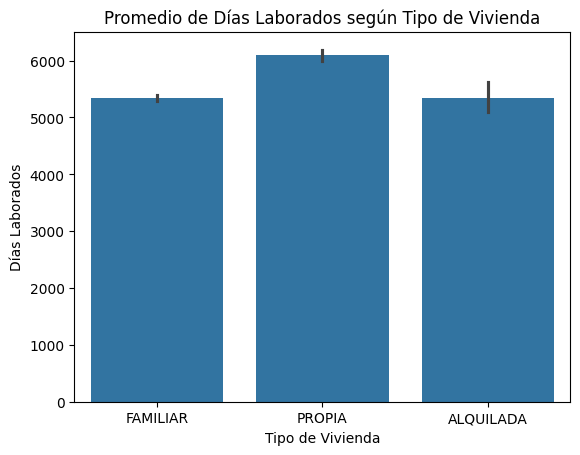

In [34]:
sns.barplot(x='vivienda', y='dias_lab', data=df)
plt.title('Promedio de Días Laborados según Tipo de Vivienda')
plt.xlabel('Tipo de Vivienda')
plt.ylabel('Días Laborados')
plt.show()


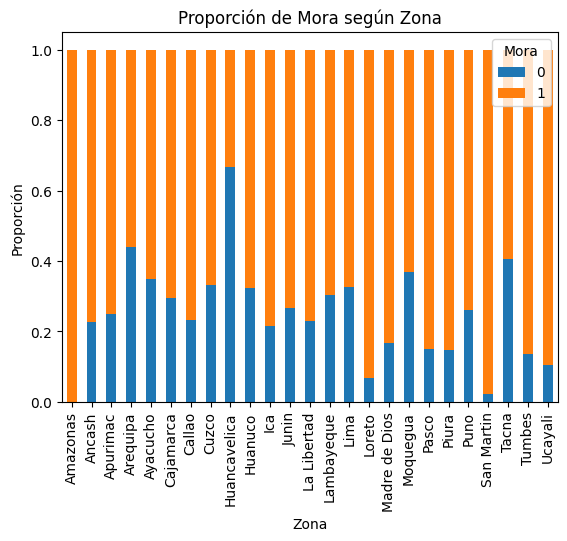

In [35]:
tabla_contingencia = pd.crosstab(df['zona'], df['mora'], normalize='index')
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Proporción de Mora según Zona')
plt.xlabel('Zona')
plt.ylabel('Proporción')
plt.legend(title='Mora', loc='upper right')
plt.show()


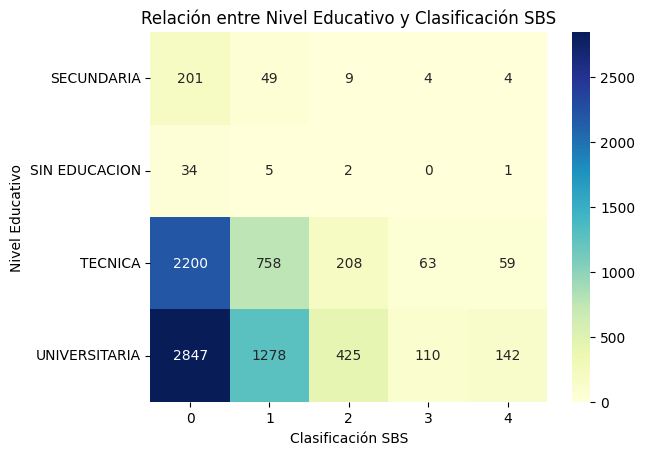

In [36]:
tabla_contingencia = pd.crosstab(df['nivel_educ'], df['clasif_sbs'])
sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relación entre Nivel Educativo y Clasificación SBS')
plt.xlabel('Clasificación SBS')
plt.ylabel('Nivel Educativo')
plt.show()


## Análisis de Tendencias

## Resumen de Hallazgos Clave

# FASE 3: Preparación de los datos

# FASE 4: Modelado

# FASE 5: Evaluación del modelo

# FASE 6: Despliegue